In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

# Data preparation

In [2]:
df = pd.read_csv("../data/Titanic.csv")
df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

# fill missing values
df = df.fillna({"Age": df.Age.median(), "Embarked": df.Embarked.mode()[0]})

# one-hot-encoding
df = pd.get_dummies(df, columns=["Pclass", "Sex", "SibSp", "Parch", "Embarked"])

# min-max-scaling
scaler = MinMaxScaler()
df[["Age", "Fare"]] = scaler.fit_transform(df[["Age", "Fare"]])

df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,0.271174,0.014151,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,0.472229,0.139136,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,0.321438,0.015469,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0.434531,0.103644,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,0.434531,0.015713,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


# Train-Test-Split

In [3]:
x = df.drop("Survived", axis=1).values
y = df[["Survived"]].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Helper Functions

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(predictions, labels):
    N = labels.size 
    mse = ((predictions - labels)**2).sum() / (2*N)
    
    return mse

def accuracy(predictions, labels):
    predicions_correct = predictions.round() == labels
    accuracy = predicions_correct.mean()
    
    return accuracy

# Parameters

In [5]:
learning_rate = 0.1
epochs = 10000
N = y_train.size

n_input = 24
n_hidden = 4
n_output = 1

# Weight Initialization

In [6]:
np.random.seed(10)

weights_1 = np.random.normal(scale=0.5, size=(n_input, n_hidden))   # (24, 4)
weights_2 = np.random.normal(scale=0.5, size=(n_hidden, n_output))  # (4, 1)

# Training the Neural Network

In [7]:
monitoring = {"mean_squared_error": [], "accuracy": []}
for epoch in range(epochs):

    # feedforward
    hidden_layer = sigmoid(np.dot(x_train, weights_1))        # (712, 4)
    output_layer = sigmoid(np.dot(hidden_layer, weights_2))   # (712, 1)
    
    # monitor training process
    mse = mean_squared_error(output_layer, y_train)
    acc = accuracy(output_layer, y_train)
    monitoring["mean_squared_error"].append(mse)
    monitoring["accuracy"].append(acc)
 
    # backpropagation
    output_layer_delta = (output_layer - y_train) * output_layer * (1 - output_layer)                 # (712, 1)
    hidden_layer_delta = np.dot(output_layer_delta, weights_2.T) * hidden_layer * (1 - hidden_layer)  # (712, 4)

    # weight updates
    weights_2 -= learning_rate * np.dot(hidden_layer.T, output_layer_delta) / N   # (4, 1)
    weights_1 -= learning_rate * np.dot(x_train.T, hidden_layer_delta) / N        # (24, 4)

monitoring_df = pd.DataFrame(monitoring)

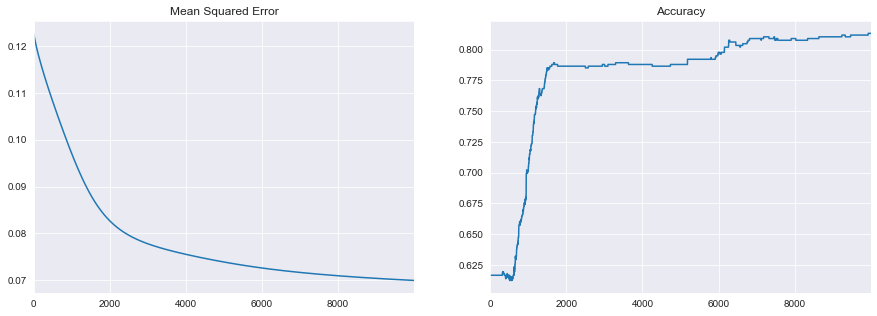

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

monitoring_df.mean_squared_error.plot(ax=axes[0], title="Mean Squared Error")
monitoring_df.accuracy.plot(ax=axes[1], title="Accuracy");

# Test Data

In [9]:
# feedforward
hidden_layer = sigmoid(np.dot(x_test, weights_1))        # (712, 4)
output_layer = sigmoid(np.dot(hidden_layer, weights_2))   # (712, 1)

In [10]:
acc = accuracy(output_layer, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.8156424581005587
